
# Práctica 4: Metaheurísticas basadas en poblaciones - Sistemas de Colonias de Hormigas

<center><h3>
    Eloi Corral López
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Colonias.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Colonias.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Colonias.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.

## El Problema del Viajante de Comercio (VC) con Sistemas de Colonias de Hormigas

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver
el problema del VC mediante la metaheurística (MH) de algoritmos para sistemas de colonias de
hormigas (ACS, *Ant Colony Systems*, del inglés).

Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás algunos de los parámetros de diseño del algoritmo en relación a la calidad de las soluciones alcanzadas.

Recuerda que debes importar el módulo Python que acompaña esta práctica, que como ocurría en prácticas anteriores implementa la carga de datos y el cálculo de distancias utilizando una matriz de adyacencia de acuerdo a la definición del problema ya vista.

In [6]:
from helpers_mod_aco import *

g1=Localizaciones(filename='./data/grafo8cidades.txt')
g2=Localizaciones(filename='./data/US120.txt')


# distancia entre ciudad 0 y 1 son unos 55 km
print (g2.nciudades)

40



## P4.1: Implementación de Sistemas de Colonias de Hormigas (SCH)


Implementa el algoritmo de sistemas de colonia de hormigas que materializa la MH vista en la sesión expositiva y revisar las notas particulares para el problema de VC. Para facilitar vuestra labor, se os proporciona aquí una descripción algorítmica de referencia.



1. Establecer parámetros: G, m, q<sub>0</sub>, τ<sub>0</sub>, ρ, 𝛏, iter<sub>min</sub>, iter<sub>max</sub>, iter<sub>sinmejoras</sub>, ratio<sub>mejora</sub>

2. Inicializar pistas de feromonas: ∀ i, j τ<sub>ij</sub> = τ<sub>0</sub>

3. HACER

    3.1. PARA cada hormiga k en colonia m HACER
        3.1.1.construir una solución para k siguiendo la regla de decisión a cada paso:
              
$$
j=
\begin{cases}
argmax_{l\in N_i^k} \{ [\tau_{il}]^\alpha [\eta_{il}]^\beta \}, \text{if } q \leq q_0;\\
J, \text{en otro caso;}
\end{cases}
$$
              
    , donde J es la exploración dirigida por:
              
$$ p_{ij}^{k} = \frac{[\tau_{ij}]^\alpha [\eta_{ij}]^\beta}{\sum_{l\in N_i^k} [\tau_{il}]^\alpha [\eta_{il}]^\beta},    \text{if } j\in N_i^k $$

      3.1.2. (opcional) Aplicar actualización de feromona local/online con la regla:
$$ τ_{ij} ← (1 - 𝛏) τ_{ij} + 𝛏 τ_{0} $$
    
    3.2. FPARA 
        
    3.3. Evalúa soluciones en la colonia m y registrar la mejor solución hasta el momento T<sup>bs</sup> .

    3.4. Aplicar actualización de feromona global/offline con la regla:

$$τ_{ij} ← (1-ρ) τ_{ij} + ρ Δτ_{ij}^{bs}, ∀(i, j) ∈T^{bs}$$

4. HASTA cumplir la condición de parada



La implementación debe permitir la inicialización de los parámetros y estructuras de información asociadas como sigue:
- Probabilidad de explotación q<sub>0</sub>=0.5.
- Inicialización de la información heurística: η<sub>ij</sub>=1/d<sub>ij</sub>, ∀(i, j), donde d<sub>ij</sub> es la distancia directa entre las ciudades *i* y *j*.
- Inicialización de las pistas de feromonas (depósito inicial): τ<sub>ij</sub>= τ<sub>0</sub>= 1 /(n C<sup>NN</sup>) ∀(i, j) donde n es el número de ciudades y C<sup>NN</sup> es el coste del tour generado siguiendo una estrategia voraz del vecino más próximo (NN, *Nearest Neighbour*).
- Parámetros de influencia de las pistas de feromonas (α) e información heurística (β) en la regla de decisión establecidos a 1 y 3 respectivamente 
- Ratio de evaporación de feromona: deberás probar con diferentes magnitudes (p.ej., ρ=0.01, ρ=0.1 y ρ=0.5)
- Actualización de feromona global con depósito elitista basado en la mejor solución (bs, *best solution*):
    τ<sub>ij</sub> ← (1-ρ) τ<sub>ij</sub> + ρ Δτ<sub>ij</sub><sup>bs</sup>, ∀(i, j) ∈T<sup>bs</sup>, donde Δτ<sub>ij</sub><sup>bs</sup>=1/C<sup>bs</sup>
- Actualización de feromona local siguiendo la regla:
    τ<sub>ij</sub> ← (1- 𝛏) τ<sub>ij</sub> + 𝛏 τ<sub>0</sub>, con 𝛏=0.1
- Condición de parada que de manera combinada tenga en cuenta iter<sub>min</sub>, iter<sub>max</sub>, iter <sub>sinmejoras</sub>, ratio<sub>mejora</sub>
- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros puedan ser establecidos en cada ejecución/problema, y que puedas modificar la inicialización heurística y de pistas de feromona, puedas fácilmente reemplazar las reglas de actualización de feromonas, activar/desactivar la actualización local de actualización de feromona, etc.

Prueba tu implementación tomando instancias de problemas que has utilizado en prácticas anteriores. Lanza varias ejecuciones para verificar que puede resolver el problema con los problemas de las 8 ciudades gallegas (`data/grafo8cidades.txt`) y de las 120 ciudades estadounidenses (`data/US120.txt`).


In [2]:
g1.nciudades

8

In [30]:
# Escribe aquí tu código para la(s) función(es) que implementa tu algoritmo para el sistema de colonias de hormigas
# Crea tantas celdas como consideres oportuno para escribir tu código
# Documenta siempre tu código con comentarios como este
import numpy as np
import random
from tqdm.notebook import trange, tqdm


def genera_solucion_inicial(g):
    
    
    solucion=[]
    solucion.append(0)#añadimos ciudad de partida para los cálculos

    for i in range(g.nciudades-1):
        sig=0
        coste=float('inf')
        #recorremos las ciudades
        for j in range(1,g.nciudades):
            #elegimos la de menor distancia si no ha sido elegida aún
            if(j not in solucion and g.distancia(solucion[i],j)<coste):
                sig=j
                coste=g.distancia(solucion[i],j)

        solucion.append(sig)
    solucion.append(0)#eliminamos el 0 de partida para contar como solución solo las permutaciones del medio
    return solucion

#Función que calcula el coste de una solución dada
def coste_solucion(S,g):
    coste=0
    
    #recorremos la solución sumando costes
    for i in range (0, len(S)-1):
        coste+=g.distancia(S[i],S[i+1])
        #print(S[i],"--",S[i+1])
        
    return coste





def inicializar_mat_heuristica(g):
    heuristica=np.zeros((g.nciudades,g.nciudades))
    for i in range(g.nciudades):
        for j in range(g.nciudades):
            if(i==j):
                heuristica[i][j]=0
            else:     
                heuristica[i][j]=1/g.distancia(i,j)
    return heuristica

def inicializar_pistas_feromonas(g):
    #calculo CNN
    cnn=coste_solucion(genera_solucion_inicial(g),g)
    #print(cnn)
    pistas=np.full((g.nciudades, g.nciudades), 1/(g.nciudades*cnn))
    return pistas

def decision(actual, sinvisitar, q0, n, t, alpha=1,beta=3):
    
    #Elección de estrategia
    q = random.uniform(0,1)
    if(q<=q0):
        return explotacion(actual, sinvisitar,n,t,alpha,beta)
    else:
        return exploracion(actual, sinvisitar,n,t,alpha,beta)
    
    
            
def explotacion(actual,sinvisitar,n,t,alpha=1,beta=3):
    pesos=[]
    #calculo pesos
    for i in sinvisitar:
        pesos.append([i,((t[actual][i])**alpha)*((n[actual][i])**beta)])
    
    #Ordeno según peso
    pesos.sort(key=lambda x: x[1],reverse=True)
    print(pesos)
    return pesos[0][0]
        
def exploracion(actual,sinvisitar,n,t,alpha=1,beta=3):
    probabilidades=[]
    
    #calculo denominador
    denominador=sum([((t[actual][v])**alpha)*((n[actual][v])**beta) for v in sinvisitar])
    
    #calculo probabilidades
    for i in sinvisitar:
        probabilidades.append([i,((((t[actual][i])**alpha)*((n[actual][i])**beta))/denominador)])
        
    probabilidades.sort(key=lambda x: x[1],reverse=True)
    print(probabilidades)
    #tiro moneda
    q = random.uniform(0,1)
    
    #recorro probabilidades según intervalo
    interv=0
    proximaciudad=-10
    for p in probabilidades:
        interv+=p[1]
        
        if(q<=interv):
            proximaciudad=p[0]
            break
    
    return proximaciudad

#Genera solución hormiga
def solucion(g,n,t,alpha=1,beta=3,pexpl=0.5):
    s=[]
    s.append(0)
    disponibles=[i for i in range(1,g.nciudades)]
    for i in range(1,g.nciudades):
        c=decision(s[-1], disponibles, pexpl, n, t, alpha,beta)
        #Añado nueva ciudad y la elimino de disponibles
        s.append(c)
        disponibles.remove(c)
    s.append(0)
    return s
        
#Algoritmo Colonia de hormigas       
def alg(tamcol,g,alpha=1,beta=3,pexpl=0.5,p=0.05,eps=0.1,itermin=100,itermax=1000,itersin=50,ratiomejora=0.1):
    sinmejora=0
    costemejor=float('inf')
    costemejoriter=float('inf')
    n=inicializar_mat_heuristica(g)
    t=inicializar_pistas_feromonas(g)
    valT0=t[0][0]
    ifin=0
    
    for j in tqdm(range(itermax)):
        ifin=j
        solscolonia=[]
        for h in range(tamcol):
            #Genero solución hormiga
            s=solucion(g,n,t,alpha,beta,pexpl)
            cs=coste_solucion(s,g)
            if(cs<costemejoriter):
                Stopiter=s
                costemejoriter=cs
            #Actualización local feromona
            if(eps!=0):
                for i in range(g.nciudades):
                    t[s[i]][s[i+1]]=(1-eps)*t[s[i]][s[i+1]]+eps*valT0
        
        
        if(costemejoriter<costemejor):
            
            #Compruebo si se contabiliza como mejora
            if((costemejor-costemejoriter)/costemejor > ratiomejora):
                sinmejora=0
            else:
                sinmejora+=1
            
            #Actualizo mejor solución
            mejsol=Stopiter
            costemejor=costemejoriter
            
            
            #print(costemejor)
            
        #Actualizo pistas feromonas
        for i in range(g.nciudades):
                t[mejsol[i]][mejsol[i+1]]=(1-p)*t[mejsol[i]][mejsol[i+1]]+p*(1/costemejor)
        
        #Compruebo si fin
        if(j>=itermin and sinmejora>=itersin):
            #print("Rompe antes:",j)
            break
        
        
        
    print("Última iteracion:",ifin)
    
    return ([mejsol,costemejor])

   
        
random.seed(0)
#resul=alg(32,g2,1,3,0.5,0.1,0,80,400,100,0.001)
#n=inicializar_mat_heuristica(g2)
#t=inicializar_pistas_feromonas(g2)
#print(t)
#print(t)
#dis=[i for i in range(1,g2.nciudades)]
#act=[0,4,1]
#dis.remove(4)
#dis.remove(1)
#print(len(dis))
#print(exploracion(1,dis,n,t,alpha=1,beta=3))
#print(resul)



In [31]:
voraz=genera_solucion_inicial(g2)
print(g2.nciudades)
print(voraz)
print(coste_solucion(voraz,g2))

40
[0, 10, 22, 32, 8, 38, 36, 4, 16, 35, 18, 3, 28, 27, 7, 19, 20, 9, 34, 25, 17, 23, 24, 21, 11, 14, 37, 2, 13, 1, 12, 15, 5, 31, 33, 29, 39, 6, 30, 26, 0]
19514.977477339682


In [32]:
print(inicializar_pistas_feromonas(g2))

[[1.28106733e-06 1.28106733e-06 1.28106733e-06 ... 1.28106733e-06
  1.28106733e-06 1.28106733e-06]
 [1.28106733e-06 1.28106733e-06 1.28106733e-06 ... 1.28106733e-06
  1.28106733e-06 1.28106733e-06]
 [1.28106733e-06 1.28106733e-06 1.28106733e-06 ... 1.28106733e-06
  1.28106733e-06 1.28106733e-06]
 ...
 [1.28106733e-06 1.28106733e-06 1.28106733e-06 ... 1.28106733e-06
  1.28106733e-06 1.28106733e-06]
 [1.28106733e-06 1.28106733e-06 1.28106733e-06 ... 1.28106733e-06
  1.28106733e-06 1.28106733e-06]
 [1.28106733e-06 1.28106733e-06 1.28106733e-06 ... 1.28106733e-06
  1.28106733e-06 1.28106733e-06]]


In [33]:
disp=[i for i in range(1,g2.nciudades)]
print(len(disp))
nn=inicializar_mat_heuristica(g2)
tt=inicializar_pistas_feromonas(g2)
ciud=explotacion(0,disp,nn,tt,alpha=1,beta=3)
print(ciud)

39
[[10, 4.845603127344132e-13], [13, 4.135625436029285e-13], [22, 1.2303386108556428e-13], [32, 4.7694109856628236e-14], [8, 4.581256425021378e-14], [2, 2.0821616852715973e-14], [37, 8.971717228178459e-15], [38, 8.852201179133939e-15], [36, 3.2627140423832058e-15], [4, 2.4195006195679147e-15], [35, 2.0814831262111514e-15], [14, 1.956394653573107e-15], [16, 1.780483230732797e-15], [18, 1.339266951809319e-15], [11, 1.0421523456692029e-15], [3, 8.1984134284741955e-16], [21, 6.055670022917593e-16], [28, 5.741729865315301e-16], [27, 3.7024259133664543e-16], [7, 3.605096858462852e-16], [24, 3.539737548524607e-16], [1, 3.1479416415758384e-16], [26, 2.1914430481920443e-16], [19, 1.9530939897418443e-16], [12, 1.932854708587974e-16], [23, 1.9241955831976028e-16], [34, 1.9218688017825016e-16], [9, 1.8504083044427593e-16], [20, 1.7838216897497103e-16], [15, 1.4871049908217748e-16], [25, 1.3381497601989498e-16], [17, 1.3380360253373043e-16], [31, 8.749276094774118e-17], [5, 7.77733375034101e-17], 

In [34]:
print(len(disp))
ciud=exploracion(0,disp,nn,tt,alpha=1,beta=3)

39
[[10, 0.4132064519907171], [13, 0.3526634493735047], [22, 0.10491652716459512], [32, 0.04067092041339857], [8, 0.03906644154079357], [2, 0.01775553258967893], [37, 0.007650588268774515], [38, 0.00754867153873331], [36, 0.0027822635446671158], [4, 0.002063217395909522], [35, 0.0017749746210265174], [14, 0.001668306033844814], [16, 0.001518298422849393], [18, 0.0011420533850630596], [11, 0.0008886903484887734], [3, 0.0006991157211402974], [21, 0.0005163943184855501], [28, 0.0004896232241034664], [27, 0.0003157225705893004], [7, 0.0003074228827289019], [24, 0.0003018493993349067], [1, 0.0002684391937608652], [26, 0.0001868742410151675], [19, 0.00016654914088020948], [12, 0.0001648232460149779], [23, 0.0001640848433051672], [34, 0.00016388642815068078], [9, 0.00015779266896586054], [20, 0.00015211452775530125], [15, 0.00012681215544203055], [25, 0.00011411007053462471], [17, 0.00011410037184956669], [31, 7.460902673204125e-05], [5, 6.632083562087885e-05], [29, 3.660919704997442e-05], [3

In [35]:
print(ciud)

22


In [36]:
cv=coste_solucion(voraz,g2)
print(voraz)
print(cv)
print()
print(tt[22][13])
#Actualizo pistas feromonas
for i in range(g2.nciudades):
    print(voraz[i],"---",voraz[i+1])
    tt[voraz[i]][voraz[i+1]]=(1-0.1)*tt[voraz[i]][voraz[i+1]]+0.1*(1/cv)

print(tt[22][13])

[0, 10, 22, 32, 8, 38, 36, 4, 16, 35, 18, 3, 28, 27, 7, 19, 20, 9, 34, 25, 17, 23, 24, 21, 11, 14, 37, 2, 13, 1, 12, 15, 5, 31, 33, 29, 39, 6, 30, 26, 0]
19514.977477339682

1.2810673252905055e-06
0 --- 10
10 --- 22
22 --- 32
32 --- 8
8 --- 38
38 --- 36
36 --- 4
4 --- 16
16 --- 35
35 --- 18
18 --- 3
3 --- 28
28 --- 27
27 --- 7
7 --- 19
19 --- 20
20 --- 9
9 --- 34
34 --- 25
25 --- 17
17 --- 23
23 --- 24
24 --- 21
21 --- 11
11 --- 14
14 --- 37
37 --- 2
2 --- 13
13 --- 1
1 --- 12
12 --- 15
15 --- 5
5 --- 31
31 --- 33
33 --- 29
29 --- 39
39 --- 6
6 --- 30
30 --- 26
26 --- 0
1.2810673252905055e-06


In [37]:
print(tt[13][22])

1.2810673252905055e-06


❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). Explica también cómo has realizado la verificación de tu implementación.

El código se divide en diferentes funciones, siendo una de ellas la principal que alberga el algoritmo de colonia de hormigas. Funciones:

    -genera_solucion_inicial: genera la solución de partida voraz para calcular la matriz de feromonas
    
    -inicializar_mat_heuristica: crea la matriz heurística
    
    -inicializar_pistas_feromonas: crea la matriz de pistas de feromonas
    
    -decision: decide, según la probabilidad de explotación, si explorar o explotar generando un número aleatorio entre 0 y 1
    
    -explotacion: a partir de la ciudad actual, las pendientes de visitar, las matrices y los valores de alpha y beta calcula la siguiente ciudad a visitar.
    
    -exploracion: a partir de la ciudad actual, las pendientes de visitar, las matrices y los valores de alpha y beta calcula la probabilidad de visitar cada ciudad. Luego genera un número aleatorio entre 0y 1 que decide cual visitar.
    
    -solucion: genera una solución para el problema invocando repetidamente la función de decision.
    
Para verificar el código se utilizaron diferentes prints para comprobar las salidas de cada función. 
    
    

## P4.2: Laboratorio

Realiza los laboratorios planteados a continuación para estudiar los efectos de los parámetros de la metaheurística. Para esta práctica, reporta también el coste temporal promedio de resolución.

❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la colonia: 1, 2, 4, 8, 16, 32, 64, 128,... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? 

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de explotación q<sub>0</sub> en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué?

❓ **Pregunta 4**. Estudia la influencia de pistas de feromonas e información heurística: α=1; β=2, ..., 5. ¿Qué valor de α y β recomendarías? ¿Por qué?

❓ **Pregunta 5**. Finalmente, argumenta de manera crítica las diferencias y similitudes con la metaheurísticas vistas hasta el momento en las interactivas/prácticas anteriores. Discute críticamente acerca de las bondades y limitaciones de las técnicas. Por ejemplo: ¿Eres capaz de resolver instancias de diferente tamaño? ¿Con cuál estás obteniendo mejores soluciones? ¿Cuál parece tener más limitaciones en términos de tiempo de ejecución necesario? ¿Te quedarías con una de las Metaheurísticas en vista de los resultados obtenidos? ¿Cuál/es y por qué?

***Apoya todas tus respuestas en datos-gráficos resultantes de tus estudios***. Para la pregunta 4 no es necesario volver a tomar datos, pues puedes tomar los resultados y evidencias obtenidas en prácticas anteriores.
No olvides indicar qué valores has establecido para los parámetros relacionados a la condición de parada.

*Importante*: además de la calidad de la soluciones obtenidas, en esta práctica debes medir tiempos para tomar medidas operativas sobre el número de repeticiones que permitan realizar promedios y prescindir de manera razonada de valores en las series de ejecución que no sean computacionalmente rentables/viables con tu implementación/ordenador (p.ej., tamaños de colonia elevados pueden tomar mucho tiempo para resolver).


### Pregunta 2
En este apartado se tratará de comproar como afecta el tamaño de la colonia a la calidad de la solución producida. Para ello se probará con los tamaños: 1,2,4,8,16,32,64 y 128. Se realizan 5 ejecuciones para cada uno. 

Para la realización de las pruebas se fijaron algunos parámetros del algoritmo. En primer lugar se establecieron el número de iteraciones máximas y el número de iteraciones mínimas a 400 y 200 respectivamente. A su vez se estableció el número de iteraciones sin mejora a 30 y el ratio de mejora a 0.01 (1%). Por otra parte se fijaron alpha y beta a 1 y 3 resectivamente. La probabilidad de explotación se fija a 0.5 y el ratio de evaporación a 0.1. La actualización local de feromona está desactivada.

A continuación se muestra el código y los resultados obtenidos:

<IPython.core.display.Javascript object>


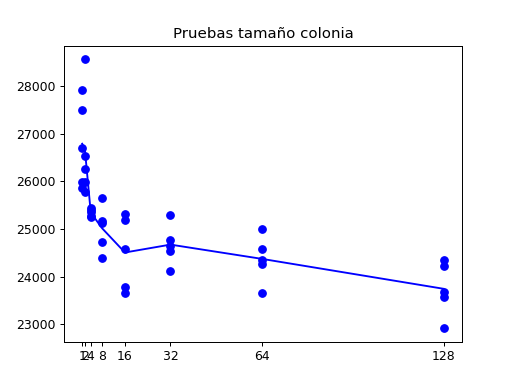

  0%|          | 0/8 [00:00<?, ?it/s]

TAMAÑO: 1


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 2


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 4


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 8


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 16


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 32


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 64


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
TAMAÑO: 128


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 331
=====TAMAÑO  1 =====

Media coste mitades: 26789.20636865076

Desviación típica mitades 906.8167170422413

Media tiempo mitades: 4.3669427871704105


=====TAMAÑO  2 =====

Media coste mitades: 26622.095024942566

Desviación típica mitades 1121.0886613491816

Media tiempo mitades: 9.50360336303711


=====TAMAÑO  4 =====

Media coste mitades: 25343.77310630274

Desviación típica mitades 80.16641112147441

Media tiempo mitades: 18.97881498336792


=====TAMAÑO  8 =====

Media coste mitades: 25013.785646580527

Desviación típica mitades 478.05599420424403

Media tiempo mitades: 37.80262050628662


=====TAMAÑO  16 =====

Media coste mitades: 24505.79350411356

Desviación típica mitades 770.9972703206172

Media tiempo mitades: 75.70502319335938


=====TAMAÑO  32 =====

Media coste mitades: 24671.355615217413

Desviación típica mitades 424.97678276847154

Media tiempo mitades: 151.1738

In [28]:
# puedes añadir aquí la implementación o cualquier código que necesites para responder las preguntas
# utiliza tantas celdas como necesites
%matplotlib notebook

import matplotlib.pyplot as plt 
import statistics
import time
#numero de pruebas
NUMPRUEBAS=5

random.seed(1)

g2=Localizaciones(filename='./data/US120.txt')



tamanhos=[2**i for i in range(8)]

#creamos figura y ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas tamaño colonia")
ax.set_xticks(tamanhos)

#lista para almacenar los resultados
resultados=[]
#listas para almacenar las medias y poder imprimirlas como líneas luego
medias=[]

for t in tqdm(tamanhos):
    print("TAMAÑO:",t)
    
    #Resultados y tiempos parciales
    rp=[]
    tp=[]
    for i in tqdm(range(NUMPRUEBAS)):
        #Mitades
        inicio=time.time()
        rp.append(alg(t,g2,1,3,0.5,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp.append(final-inicio)
        
    
    #Guardamos resultados
    resultados.append([t,rp,tp])

#recorremos los resultados imprimiendo cada uno como un punto en la gráfica, asignándole un color
for i in range(len(tamanhos)):
    
    for j in range(NUMPRUEBAS):
        ax.plot(tamanhos[i],resultados[i][1][j], "bo")
    
    #guardamos las medias para las líneas de la gráfica
    medias.append(statistics.mean(resultados[i][1]))
     
    #Impresión de valores
    print("=====TAMAÑO ",tamanhos[i],"=====")
    print()
    print("Media coste mitades:",statistics.mean(resultados[i][1]))
    print()
    print("Desviación típica mitades",statistics.stdev(resultados[i][1]))
    print()
    print("Media tiempo mitades:",statistics.mean(resultados[i][2]))
    print()
    print()
        

print()
#Impresión de las líneas de las medias
plt.plot(tamanhos,medias,color='blue')
plt.show()

### Resultados

Observando la gráfica se puede observar como el coste de la solución disminuye drásticamente para los primeros tamaños y tiende a estabilizarse a medida que estos van aumentando. La mejor solución, como resultaría deducible, se obtiene para el tamaño 128. Sin embargo, también se observa un buen rendimiento en el caso de tamaño 16, el cúal cuenta con mínimos cercanos a la media de soluciones de tamaño 128.

Dicho buen rendimiento para el tamaño 16 permite intuir que podría ser un buen candidato como solución de compromiso. Si se observa el tiempo medio de ejecución y el coste medio, en el caso del tamaño 16 es de 75s y 24505, para 32 son 151s y 24671, para 64 son 306s y 24373 y para 128 son 587s y 23743. Las alternativas de 32 y 64 parecen poco óptimas ya que una no aporta mejora y otra únicamente mejora en 132, tardando 4 veces más tiempo. En cuanto a la alternativa de 128, esta sí mejora el coste en casi 1000, pero tardando alrededor de 8 veces más. En definitiva, podría optarse por el tamaño 128 para casos en los que la importancia de obtener el menor coste es máxima y el exceso de tiempo de ejecución no supone grandes problemas, pero para este caso se optará por el tamaño 16 por obtener buenos resultados con un tiempo de ejecución limitado.

En los siguientes apartados se fijará el tamaño a 16 en consecuencia.

### Pregunta 3

Para la realización de este segundo apartado se fijó el tamaño observado como óptimo en el apartado anterior (16) y se conservó el resto de parámetros utilizados. Dado que el objetivo del apartado es observar como afecta la probabilidad de explotación a la calidad de las soluciones, se fue variando esta con los valores 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 y 0.95, ejecutando el algoritmo 5 veces para cada valor.

A continuación se muestra el código y los resultados obtenidos:


<IPython.core.display.Javascript object>


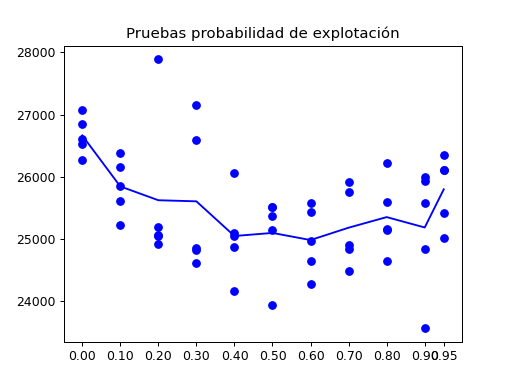

  0%|          | 0/11 [00:00<?, ?it/s]

PROBABILIDAD: 0


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.1


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.2


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.3


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.4


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.5


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.6


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.7


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.8


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.9


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
PROBABILIDAD: 0.95


  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
=====PROBABILIDAD  0 =====

Media coste: 26666.30791969111

Desviación típica: 306.66194476394145

Media tiempo: 99.46130771636963


=====PROBABILIDAD  0.1 =====

Media coste: 25846.587408645053

Desviación típica: 457.89282808870144

Media tiempo: 99.92385759353638


=====PROBABILIDAD  0.2 =====

Media coste: 25624.508881312635

Desviación típica: 1268.478196045778

Media tiempo: 96.19363532066345


=====PROBABILIDAD  0.3 =====

Media coste: 25606.915337843224

Desviación típica: 1175.3284396332665

Media tiempo: 88.04863777160645


=====PROBABILIDAD  0.4 =====

Media coste: 25050.042094278953

Desviación típica: 679.0447856908949

Media tiempo: 82.92525553703308


=====PROBABILIDAD  0.5 =====

Media coste: 25099.371662785034

Desviación típica: 660.1588480775079

Media tiempo: 82.03742704391479


=====PROBABILIDAD  0.6 =====

Media coste: 24984.95429502645

Desviación típica:

In [29]:
# puedes añadir aquí la implementación o cualquier código que necesites para responder las preguntas
# utiliza tantas celdas como necesites
%matplotlib notebook

import matplotlib.pyplot as plt 
import statistics
import time
#numero de pruebas
NUMPRUEBAS=5

random.seed(1)

g2=Localizaciones(filename='./data/US120.txt')



probabilidades=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]

#creamos figura y ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas probabilidad de explotación")
ax.set_xticks(probabilidades)

#lista para almacenar los resultados
resultados=[]
#listas para almacenar las medias y poder imprimirlas como líneas luego
medias=[]

for p in tqdm(probabilidades):
    print("PROBABILIDAD:",p)
    
    #Resultados y tiempos parciales
    rp=[]
    tp=[]
    for i in tqdm(range(NUMPRUEBAS)):
        inicio=time.time()
        rp.append(alg(16,g2,1,3,p,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp.append(final-inicio)
        
    
    #Guardamos resultados
    resultados.append([p,rp,tp])

#recorremos los resultados imprimiendo cada uno como un punto en la gráfica, asignándole un color
for i in range(len(probabilidades)):
    
    for j in range(NUMPRUEBAS):
        ax.plot(probabilidades[i],resultados[i][1][j], "bo")
    
    #guardamos las medias para las líneas de la gráfica
    medias.append(statistics.mean(resultados[i][1]))
     
    #Impresión de valores
    print("=====PROBABILIDAD ",probabilidades[i],"=====")
    print()
    print("Media coste:",statistics.mean(resultados[i][1]))
    print()
    print("Desviación típica:",statistics.stdev(resultados[i][1]))
    print()
    print("Media tiempo:",statistics.mean(resultados[i][2]))
    print()
    print()
        

print()
#Impresión de las líneas de las medias
plt.plot(probabilidades,medias,color='blue')
plt.show()

### Resultados
Con una primera observación de la gráfica se puede detectar que los mejores resultados se obtienen con valores intermedios de probabilidad. Como consecuencia la gráfica tiene una forma ligeramente similar a una parábola. Prestando más atención se puede vislumbrar también que, pese a la forma parábolica, sí que asemejan ser ligeramente más bajos los costes de probabilidades muy altas que los de probabilidades muy bajas. Esto puede deberse a que ante probabilidades muy bajas de explotación el algoritmo se encuentra con dificultades para encontrar una buena solución al estar tomando con demasiada frecuencia caminos menos prometedores para la hormiga (explorando). 

En concreto en este caso se observó que la menor media se dá en el caso de probabilidad 0.6 con 24984, muy cercano a los 25099 de 0.5 o a los 25050 de 0.4. Además, los tiempos de ejecución tienden a ser menores a medida que aumenta la probabilidad (por ser más simples los cálculos al explotar). En el caso de 0.6 la media es de 75s mientras que en 0.4 y 0.5 ronda los 82s.

En este caso se tomará la probabilidad 0.6 por ofrecer los mejores resultados y en un tiempo razonable.

### Pregunta 4
En este apartado se tratará de observar como afectan los valores de alpha y beta en la calidad de los resultados. Para ello se realizará una gráfica con varias funciones, cada una corresponderá con un valor de alpha y se podrá ver como evoluciona el coste en cada una de ellas a medida que se varía beta. Se probará con valores del 1 al 5 tanto para alpha como para beta. En este caso concreto se reduce el número de ejecuciones por cada par a 3 ya que de lo contrario se demoraría en exceso dado el alto número de combinaciones.

El resto de parámetros se conservarán los determinados en el primer apartado del laboratorio, a excepción del tamaño y la probabilidad, que se establecieron, tras investigar en los dos apartados anteriores, como 16 y 0.6 respectivamente.

A continuación se muestra el código y los resultados:

<IPython.core.display.Javascript object>


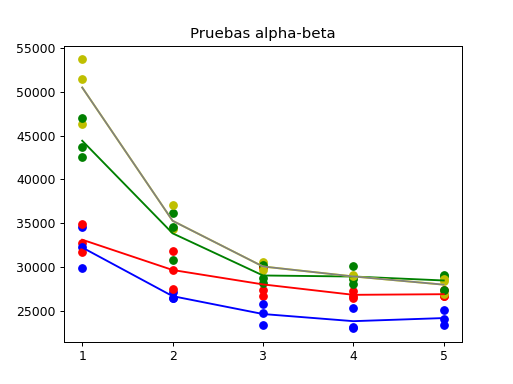

  0%|          | 0/5 [00:00<?, ?it/s]

Beta: 1


  0%|          | 0/3 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Beta: 2


  0%|          | 0/3 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Beta: 3


  0%|          | 0/3 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Beta: 4


  0%|          | 0/3 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Beta: 5


  0%|          | 0/3 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399


=====Beta:  1 =====

MEDIAS:
Media coste alpha 1: 32242.733286726292
Media coste alpha 2: 33129.03534370643
Media coste alpha 3: 44410.584917627915
Media coste alpha 4: 50476.893282312936
Media coste alpha 5: 52811.313324167284

DESVIACIÓN TÍPICA:
Desviación típica alpha 1: 2336.0365731854436
Desviación típica alpha 2: 1616.4732165870635
Desviación típica alpha 3: 2324.220828951875
Desviación típica alpha 4: 3808.130398143531
Desviación típica alpha 5: 699.950469024868

TIEMPOS:
Media tiempo alpha 1: 72.40335536003113
Media tiempo alpha 2: 74.63977599143982
Media tiempo alpha 3: 74.9442884127299
Media tiempo alpha 4: 73.48147789637248
Media tiempo alpha 5: 74.

In [40]:
%matplotlib notebook

import matplotlib.pyplot as plt 
import statistics

#numero de pruebas
NUMPRUEBAS=3


g2=Localizaciones(filename='./data/US120.txt')



betas=[1,2,3,4,5]

#creamos figura y ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
ax.set_title("Pruebas alpha-beta")
ax.set_xticks(betas)

#listas para almacenar los resultados
resultados_alpha1=[]
resultados_alpha2=[]
resultados_alpha3=[]
resultados_alpha4=[]
resultados_alpha5=[]
#listas para almacenar las medias y poder imprimirlas como líneas luego
medias_alpha1=[]
medias_alpha2=[]
medias_alpha3=[]
medias_alpha4=[]
medias_alpha5=[]

for b in tqdm(betas):
    print("Beta:",b)
    
    #Resultados y tiempos parciales
    rp1=[]
    rp2=[]
    rp3=[]
    rp4=[]
    rp5=[]
    tp1=[]
    tp2=[]
    tp3=[]
    tp4=[]
    tp5=[]
    for i in tqdm(range(NUMPRUEBAS)):
        
        inicio=time.time()
        rp1.append(alg(16,g2,1,b,0.6,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp1.append(final-inicio)
        
        inicio=time.time()
        rp2.append(alg(16,g2,2,b,0.6,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp2.append(final-inicio)
        
        inicio=time.time()
        rp3.append(alg(16,g2,3,b,0.6,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp3.append(final-inicio)
        
        inicio=time.time()
        rp4.append(alg(16,g2,4,b,0.6,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp4.append(final-inicio)
        
        inicio=time.time()
        rp5.append(alg(16,g2,5,b,0.6,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp5.append(final-inicio)
        
    
    #Guardamos resultados
    resultados_alpha1.append([b,rp1,tp1])
    resultados_alpha2.append([b,rp2,tp2])
    resultados_alpha3.append([b,rp3,tp3])
    resultados_alpha4.append([b,rp4,tp4])
    resultados_alpha5.append([b,rp5,tp5])

#recorremos los resultados imprimiendo cada uno como un punto en la gráfica, asignándole un color
#según el algoritmo
for i in range(len(betas)):
    
    for j in range(NUMPRUEBAS):
        ax.plot(betas[i],resultados_alpha1[i][1][j], "bo")
        ax.plot(betas[i],resultados_alpha2[i][1][j], "ro")
        ax.plot(betas[i],resultados_alpha3[i][1][j], "go")
        ax.plot(betas[i],resultados_alpha4[i][1][j], "yo")
        ax.plot(betas[i],resultados_alpha5[i][1][j], "grey")
    
    #guardamos las medias para las líneas de la gráfica
    medias_alpha1.append(statistics.mean(resultados_alpha1[i][1]))
    medias_alpha2.append(statistics.mean(resultados_alpha2[i][1]))
    medias_alpha3.append(statistics.mean(resultados_alpha3[i][1]))
    medias_alpha4.append(statistics.mean(resultados_alpha4[i][1]))
    medias_alpha5.append(statistics.mean(resultados_alpha5[i][1]))
     
    #Impresión de valores
    print()
    print()
    print("=====Beta: ",betas[i],"=====")
    print()
    print("MEDIAS:")
    print("Media coste alpha 1:",statistics.mean(resultados_alpha1[i][1]))
    print("Media coste alpha 2:",statistics.mean(resultados_alpha2[i][1]))
    print("Media coste alpha 3:",statistics.mean(resultados_alpha3[i][1]))
    print("Media coste alpha 4:",statistics.mean(resultados_alpha4[i][1])) 
    print("Media coste alpha 5:",statistics.mean(resultados_alpha5[i][1])) 
    print()
    
    print("DESVIACIÓN TÍPICA:")
    print("Desviación típica alpha 1:",statistics.stdev(resultados_alpha1[i][1]))
    print("Desviación típica alpha 2:",statistics.stdev(resultados_alpha2[i][1]))
    print("Desviación típica alpha 3:",statistics.stdev(resultados_alpha3[i][1]))
    print("Desviación típica alpha 4:",statistics.stdev(resultados_alpha4[i][1])) 
    print("Desviación típica alpha 5:",statistics.stdev(resultados_alpha5[i][1])) 
    print()
        
        
    print("TIEMPOS:")
    print("Media tiempo alpha 1:",statistics.mean(resultados_alpha1[i][2]))
    print("Media tiempo alpha 2:",statistics.mean(resultados_alpha2[i][2]))
    print("Media tiempo alpha 3:",statistics.mean(resultados_alpha3[i][2]))
    print("Media tiempo alpha 4:",statistics.mean(resultados_alpha4[i][2])) 
    print("Media tiempo alpha 5:",statistics.mean(resultados_alpha5[i][2]))
    print()
        

print()
#Impresión de las líneas de las medias
plt.plot(betas,medias_alpha1,color='blue') 
plt.plot(betas,medias_alpha2,color='red') 
plt.plot(betas,medias_alpha3,color='green') 
plt.plot(betas,medias_alpha4,color='yellow') 
plt.plot(betas,medias_alpha4,color='grey') 
plt.show()

### Resultados
Azul --- Alpha=1
Rojo --- Alpha=2
Verde --- Alpha=3
Amarillo,Gris --- Alpha=4

Un pequeño error en la representación no muestra los datos de alpha=5. Dado el coste temporal de realizar una nueva ejecución se omitirá esta, ya que además los valores de la media de alpha=5 (sí impresos en texto tras la gráfica) son muy similares a los de alpha=4 y poco óptimos.

Tras un primer vistazo a la gráfica ya se puede observar un primer resultado salientable, el valor de alpha que otorga mejores resultados es, sin lugar a duda, alpha=1 (azul). Los resultados son salientablemente mejores a los del resto, siendo la más cercana alpha=2, estando aún así entorno a unos 3k de diferencia. 

En cuánto a los tiempos de ejecución, son todos similares. En consecuencia se tomará como valor óptimo de beta el que aporte la menor media. En este caso sería con alpha=1 y beta=4 con un coste medio de 23844.

### Prueba extra
Se realiza una pequeña prueba a mayores para comprobar, con 5 ejecuciones, que versión del algoritmo mide mejor, la que solo posee actualización de feromona global o la que cuenta también con actualización parcial.

A continuación se muestra el código y los resultados:

In [42]:
rp1=[]
rp2=[]
tp1=[]
tp2=[]
for i in tqdm(range(5)):
        
        inicio=time.time()
        rp1.append(alg(16,g2,1,4,0.6,0.1,0,200,400,30,0.01)[1])
        final=time.time()
        tp1.append(final-inicio)
        
        inicio=time.time()
        rp2.append(alg(16,g2,1,4,0.6,0.1,0.1,200,400,30,0.01)[1])
        final=time.time()
        tp2.append(final-inicio)

        
print("Media coste SIN actualización local:",statistics.mean(rp1))
print("Desviación típica SIN actualización local:",statistics.stdev(rp1))
print("Media tiempo SIN actualización local:",statistics.mean(tp1))

      

print("Media coste CON actualización local:",statistics.mean(rp2))
print("Desviación típica CON actualización local:",statistics.stdev(rp2))
print("Media tiempo CON actualización local:",statistics.mean(tp2))

  0%|          | 0/5 [00:00<?, ?it/s]

Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Última iteracion: 399
Media coste SIN actualización local: 24560.3773513582
Desviación típica SIN actualización local: 665.2032787517782
Media tiempo SIN actualización local: 70.87178115844726
Media coste CON actualización local: 23705.909983545716
Desviación típica CON actualización local: 263.2442714045099
Media tiempo CON actualización local: 74.10033869743347


### Resultado
Como se puede observar, la actualización local de feromona mejora el coste, pasando de 24560 sin ella a 23750 de media. Dicha mejora de coste también conlleva una ligera penalización de tiempo, de unos 4 segundos en este caso. Dicha penalización se considera sin demasiada importancia en comparación con la reducción de 810 en el coste.

### Pregunta 5
A lo largo de las prácticas de esta asignatura se han implementado 4 algoritmos diferentes y analizado su rendimiento, concretamente Temple Simulado, Búsqueda Tabú, Algoritmo Genético y Colonia de Hormigas. Los dos primeros se engloban en las metaheurísticas basadas en trayectorias, mientras que los dos últimos se incluirían en algoritmos de computación bioinspirada. Estos presentaron diferentes resultados en lo referente a la relación coste de la solución/tiempo. 

En el algoritmo de Temple Simulado se obtenían, una vez implementadas las mejoras, soluciones con un coste entorno a los 60k (por lo mencionado en la sesión post-práctica podría optimizarse todavía más hasta valores cercanos a los 50k). En lo referente al tiempo, este resultaba el algoritmo más rápido, con tiempos de ejecución de entorno a 1-2s.

En el algoritmo de Búsqueda Tabú, se observaba un salto en la calidad de las soluciones con respecto al de Temple Simulado, llegando a obtener soluciones entorno a los 25k. Dicha mejora se vería repercutida en el tiempo de ejecución, el cúal aumenta hasta alrededor de 6 minutos.

En el algoritmo Genético, la calidad de las soluciones vuelve a niveles del temple simulado, con soluciones entorno a los 60k. Sin embargo, en dicha práctica se probó con ejecuciones dotadas de recursos (tamaño de población grande, 128, y 100o iteraciones) y se llegaba a alcanzar 48k en 36s. Las soluciones con un buen compromiso coste tiempo en este caso rondaban los 6 segundos.

En el algoritmo de Colonia de Hormigas, la calidad de las soluciones es la mejor hasta el momento, alcanzando soluciones con costes entorno a los 23k. Para ello se consumen entorno a 1-2 minutos de tiempo de ejecución.

Las 4 metaheurísticas demostraron ser aptas para diferentes tamaños del problema del viajante, ya que fueron ejecutadas tanto para el problema de 8 ciudades como el de 120. De esta forma sería posible elegir una de las estrategias en función de las necesidades del problema. En caso de que se buscase la solución con menor coste posible sin importar demasiado el tiempo de ejecución convendría optar por el algoritmo de colonia de hormigas, ya que, con una media de 23k de coste, demostró ser la que mejores soluciones encuentra. A su vez podría necesitarse una solución de compromiso que reduzca el tiempo de ejecución, en este caso convendría optar o bien por el temple simulado o bien por el algoritmo genético, siendo el primero ligeramente más rápido. Por otra parte, la búsqueda tabú no constituye una buena alternativa en ninguno de los casos, ya que la colonia de hormigas obtiene mejores soluciones en menor tiempo. Sin embargo, la búsqueda tabú podría constituir una alternativa a valorar en casos en los que el ajuste de parámetros que se realiza en el resto de alternativas resulte dificultoso o imposible por la naturaleza del problema. Además, no se descarta que puedan realizarse mejoras a la búsqueda tabú que la lleven a ser una alternativa interesante.